# No Language Left Behind: Scaling Human-Centered Machine Translation

# https://arxiv.org/abs/2207.04672

# Abstract

The No Language Left Behind project addresses the inequity in machine translation (MT) by expanding support to over 200 languages, most of which are low-resource. Through novel data creation, modeling, and evaluation, the project achieves a 44% BLEU improvement over prior state-of-the-art, while prioritizing human-centered design, safety, and open access

**No Language Left Behind**

---

# Problems

- **Unequal benefits:** MT progress has disproportionately favored high-resource languages, leaving low-resource communities marginalized.  
- **Data scarcity:** Training and evaluation resources for low-resource languages are limited, costly, and inconsistent.  
- **Quality and safety issues:** Existing systems produce poor, biased, or even toxic translations for low-resource languages, eroding user trust.  
- **Ethical and cultural risks:** Without careful design, MT may reinforce digital inequalities and cultural displacement  

**No Language Left Behind**

---

# Purposes

- To break the 200-language barrier while ensuring safe, high-quality translations.  
- To design translation systems that are human-centered, inclusive of underserved communities, and ethically responsible.  
- To create open-source datasets, benchmarks, and models that advance multilingual MT research and practical use.  

---

# Methodologies

### Human-Centered Design
- Conducted 44 interviews with native speakers of 36 low-resource languages to guide principles and identify needs.  

### Data Creation
- Built **Flores-200**, a benchmark with 40k translation directions in 204 languages.  
- Developed **NLLB-Seed** and **NLLB-MD** professionally translated datasets.  
- Introduced **LASER3 encoders** and large-scale mining pipelines for low-resource bitexts.  

### Modeling Innovations
- Used **Sparsely Gated Mixture of Experts** (conditional compute).  
- Applied **self-supervised training, backtranslation, and curriculum learning**.  
- Mitigated overfitting with **data augmentation and bootstrap strategies**.  

### Evaluation
- Combined **automatic metrics** (BLEU, etc.) with **human evaluation** across thousands of directions.  
- Built **Toxicity-200**, a multilingual toxicity benchmark to assess harmful outputs.  

---

# Results

- **Coverage:** Translation expanded to 202 languages, doubling prior benchmarks.  
- **Performance:** NLLB models achieved **44% BLEU gains** over the prior state-of-the-art on Flores benchmarks.  
- **Safety:** Toxicity detection reduced harmful outputs across languages.  
- **Accessibility:** Released models from large (54.5B MoE) to distilled smaller variants for broader usability.  
- **Impact:** Deployment improved translation support for low-resource communities, e.g., enabling Wikipedia content creation  

**No Language Left Behind**

---

# Conclusions

The NLLB initiative demonstrates that scaling multilingual MT beyond 200 languages is feasible when guided by human-centered, ethical, and open-source principles. By integrating sociotechnical insights, robust datasets, innovative modeling, and rigorous evaluation, NLLB sets a foundation for universal, safe, and equitable translation systems. Future work must continue balancing scale, inclusivity, and responsibility, recognizing MT as not just a technical challenge but a cultural and social one  

**No Language Left Behind**

# 📐 Mathematical & Statistical Equations in *No Language Left Behind (NLLB)*

---

## 1. Evaluation Metrics

### BLEU (Bilingual Evaluation Understudy)
Used as the core automatic metric for translation quality.

$$
BLEU = BP \cdot \exp \left( \sum_{n=1}^{N} w_n \log p_n \right)
$$

- \(p_n\): n-gram precision  
- \(w_n\): weight for each n-gram (typically \(w_n = \frac{1}{N}\))  
- \(BP\): brevity penalty  

Brevity penalty:

$$
BP =
\begin{cases}
1, & \text{if } c > r \\
e^{(1-r/c)}, & \text{if } c \leq r
\end{cases}
$$

where \(c\) = candidate translation length, \(r\) = reference length.

---

### ChrF (Character F-score)
Character-level evaluation (robust for morphologically rich and low-resource languages).

$$
ChrF = \frac{(1+\beta^2) \cdot Precision \cdot Recall}{\beta^2 \cdot Precision + Recall}
$$

with \(\beta = 2\) commonly used.

---

### COMET / Human Agreement Metrics
While not explicit equations, they rely on **correlation coefficients** (Pearson/Spearman):

$$
\rho = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2} \cdot \sqrt{\sum_i (y_i - \bar{y})^2}}
$$

---

## 2. Mixture of Experts (MoE) – Conditional Compute

NLLB models use Sparsely Gated Mixture of Experts:

$$
y = \sum_{i=1}^{k} g_i(x) \cdot f_i(x)
$$

- \(f_i(x)\): expert function (neural sub-network)  
- \(g_i(x)\): gating probability (sparse, softmaxed)  

Gating mechanism:

$$
g(x) = Softmax(W_g x)
$$

Only top-\(k\) experts are activated, reducing compute.

---

## 3. Self-Supervised Objectives

### Masked Language Modeling (MLM)

$$
L_{MLM} = - \sum_{t \in M} \log P(x_t \mid x \setminus M)
$$

- \(M\): set of masked tokens  
- \(x_t\): true token  
- \(x \setminus M\): observed sequence with masked positions  

---

### Backtranslation

Synthetic parallel data generation:

$$
\hat{y} = MT(x), \quad D_{bt} = \{ (x, \hat{y}) \}
$$

where a source-side monolingual corpus \(x\) is translated into synthetic target \(\hat{y}\).

---

## 4. Data Mining – LASER Sentence Similarity

Parallel sentence mining uses cosine similarity in multilingual embedding space:

$$
sim(x, y) = \frac{\langle h(x), h(y) \rangle}{\|h(x)\| \cdot \|h(y)\|}
$$

- \(h(x)\): sentence embedding of \(x\)  
- \(h(y)\): sentence embedding of \(y\)  

---

## 5. Toxicity Scoring

Defined as proportion of toxic tokens flagged:

$$
Toxicity(x) = \frac{count\_toxic\_tokens(x)}{total\_tokens(x)}
$$

---

## 6. Statistical Sampling – FLORES-200

Dataset sampling from multilingual Wikipedia follows **stratified sampling**:

$$
P(select \; s_i) = \frac{1}{|S|}
$$

ensuring balanced representation across Wikinews, Wikijunior, Wikivoyage.

---

# ✅ Summary

The main mathematics in the NLLB project centers on:

- **Evaluation metrics:** BLEU, ChrF, correlation measures  
- **Modeling equations:** Mixture-of-Experts, masked language modeling, backtranslation  
- **Data mining:** cosine similarity in multilingual embeddings  
- **Safety metrics:** toxicity ratio  

These are primarily **statistical and empirical** — designed for **benchmarking, scaling, and validation** of multilingual MT rather than theoretical model proofs.

# 📊 Evaluation Metrics for Machine Translation Models

| Metric | Type | Formula / Core Idea | Strengths | Limitations | Best Use |
|--------|------|----------------------|-----------|-------------|----------|
| **BLEU (Papineni et al., 2002)** | n-gram precision | $$BLEU = BP \cdot \exp \left(\sum_{n=1}^{N} w_n \log p_n \right)$$ with brevity penalty \(BP\) | Widely adopted, simple, interpretable n-gram match | Insensitive to synonyms/paraphrases, favors shorter outputs, surface-level only | Benchmarking high-resource MT; legacy SOTA reporting |
| **ChrF / ChrF++ (Popović, 2015)** | Character n-gram F-score | $$F_\beta = \frac{(1+\beta^2)\cdot P \cdot R}{\beta^2 P + R}$$ over char n-grams | Captures morphology and inflections; language-agnostic | Less intuitive than BLEU; slower on long sequences | Evaluating morphologically rich or low-resource languages |
| **METEOR (Banerjee & Lavie, 2005)** | Word alignment with stemming & synonyms | Harmonic mean of unigram precision & recall + penalty | Handles synonyms & word order better than BLEU | More complex, language resources needed | Research on fluency/adequacy; English-focused corpora |
| **ROUGE (Lin, 2004)** | Recall-oriented n-gram overlap | $$ROUGE\text{-}N = \frac{\sum \# \text{overlap n-grams}}{\sum \# \text{ref n-grams}}$$ | Good for summarization; recall-focused | Biased toward recall, ignores precision, less common in MT | MT-summarization hybrids; adequacy-sensitive tasks |
| **TER (Translation Edit Rate) (Snover et al., 2006)** | Edit distance | $$TER = \frac{\#edits}{\#reference\;words}$$ | Intuitive: number of edits to match ref | Harsh on valid paraphrases; does not reward fluency | Post-editing cost estimation, human-in-the-loop MT |
| **COMET (Rei et al., 2020)** | Neural learned metric | Pretrained encoder (XLM-R, etc.) + regression to human judgments | Correlates best with human evaluations | Requires GPU; less interpretable | SOTA academic/industrial MT evaluation |
| **BLEURT (Sellam et al., 2020)** | Neural, fine-tuned on human judgments | BERT-based model scoring reference ↔ hypothesis | High correlation with human ratings | Black-box, resource heavy | MT research where human-like evaluation is critical |
| **Human Evaluation** | Subjective adequacy + fluency | Direct human judgments on scales (1–5) or pairwise | Gold standard; captures nuances | Expensive, slow, inconsistent across annotators | Benchmarking final production systems (NLLB, Google Translate, DeepL) |

---

# ✅ Academic Insights

- **BLEU** remains the de facto legacy benchmark but is now often complemented by **ChrF** (for morphology) and **COMET/BLEURT** (for correlation with human ratings).  
- **TER** is practical in industry for estimating post-editing effort.  
- **Human evaluation** is still the ultimate **gold standard**, especially for low-resource languages where automatic metrics may fail.  
- **NLLB (Meta, 2022)** reported results across **BLEU, ChrF, COMET, and human judgments** to capture both automatic alignment and real-world adequacy/fluency.

# 📊 Machine Translation Evaluation Metrics — Academic Summary

- **BLEU:** Measures n-gram precision between system output and references, with a brevity penalty. Legacy standard, but surface-level.  

- **ChrF / ChrF++:** Uses character n-gram F-scores to capture morphology and inflection differences; better for rich languages.  

- **METEOR:** Aligns words with stemming and synonym matching; combines precision, recall, and fragmentation penalty for fluency.  

- **ROUGE:** Recall-based n-gram overlap metric, originally for summarization, sometimes used to check adequacy in MT.  

- **TER (Translation Edit Rate):** Counts the minimum edits (insertions, deletions, substitutions, shifts) needed to match a reference.  

- **COMET:** Neural metric using multilingual encoders (e.g., XLM-R) trained to predict human adequacy/fluency judgments.  

- **BLEURT:** BERT-based learned metric fine-tuned on human ratings, designed to reflect semantic adequacy and fluency.  

- **Human Evaluation:** Direct human judgment of adequacy (meaning preserved) and fluency (naturalness), considered the gold standard.

In [24]:
# 🚀 Mini NLLB Replication (PyTorch, toy EN→DE translation)
import math, random, torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# ----------------------------
# 1. Synthetic Parallel Data
# ----------------------------
subjects = ["i","you","he","she","we","they"]
verbs = {"like":"mag","see":"sehe","eat":"esse","want":"will","know":"kenne"}
objects = {"apples":"äpfel","bread":"brot","books":"bücher","music":"musik","coffee":"kaffee"}

def make_pair():
    s = random.choice(subjects)
    v = random.choice(list(verbs.keys()))
    o = random.choice(list(objects.keys()))
    src = f"{s} {v} {o}"
    tgt = f"{ {'i':'ich','you':'du','he':'er','she':'sie','we':'wir','they':'sie'}[s] } {verbs[v]} {objects[o]}"
    return src, tgt

pairs = [make_pair() for _ in range(500)]
train, test = pairs[:400], pairs[400:]

# ----------------------------
# 2. Vocab
# ----------------------------
PAD,BOS,EOS = "<pad>","<bos>","<eos>"
def build_vocab(sents):
    toks = set(w for s in sents for w in s.split())
    itos = [PAD,BOS,EOS] + sorted(list(toks))
    stoi = {t:i for i,t in enumerate(itos)}
    return itos, stoi

src_itos, src_stoi = build_vocab([s for s,_ in train])
tgt_itos, tgt_stoi = build_vocab([t for _,t in train])

def encode(s,stoi): return [stoi[w] for w in s.split()]
def detok(ids,itos): return " ".join([itos[i] for i in ids if i<len(itos) and itos[i] not in [PAD,BOS,EOS]])

# ----------------------------
# 3. Dataset
# ----------------------------
class Parallel(Dataset):
    def __init__(self,pairs): self.p=pairs
    def __len__(self): return len(self.p)
    def __getitem__(self,i):
        s,t=self.p[i]
        s=[src_stoi[w] for w in s.split()]
        t=[tgt_stoi[BOS]]+[tgt_stoi[w] for w in t.split()]+[tgt_stoi[EOS]]
        return torch.tensor(s),torch.tensor(t)

def collate(batch):
    src,tgt=zip(*batch)
    sl=max(len(s) for s in src); tl=max(len(t) for t in tgt)
    src_out=torch.full((len(batch),sl),src_stoi[PAD])
    tgt_out=torch.full((len(batch),tl),tgt_stoi[PAD])
    for i,(s,t) in enumerate(zip(src,tgt)):
        src_out[i,:len(s)]=s; tgt_out[i,:len(t)]=t
    return src_out,tgt_out

train_loader=DataLoader(Parallel(train),batch_size=32,shuffle=True,collate_fn=collate)

# ----------------------------
# 4. Model (Transformer+MoE)
# ----------------------------
class MoE(nn.Module):
    def __init__(self,d,num_experts=2):
        super().__init__(); self.experts=nn.ModuleList([nn.Linear(d,d) for _ in range(num_experts)])
        self.gate=nn.Linear(d,num_experts)
    def forward(self,x):
        g=F.softmax(self.gate(x),-1) # (B,T,E)
        outs=sum(g[...,i:i+1]*self.experts[i](x) for i in range(len(self.experts)))
        return outs

class MT(nn.Module):
    def __init__(self,srcV,tgtV,d=64,h=2,L=2):
        super().__init__()
        self.srcE=nn.Embedding(srcV,d); self.tgtE=nn.Embedding(tgtV,d)
        self.trans=nn.Transformer(d_model=d,nhead=h,num_encoder_layers=L,num_decoder_layers=L,batch_first=True)
        self.moe=MoE(d); self.fc=nn.Linear(d,tgtV)
    def forward(self,src,tgt):
        s=self.srcE(src); t=self.tgtE(tgt)
        out=self.trans(s,t); out=self.moe(out)
        return self.fc(out)

model=MT(len(src_itos),len(tgt_itos)).to("cpu")
opt=torch.optim.Adam(model.parameters(),lr=1e-3)
pad=tgt_stoi[PAD]

# ----------------------------
# 5. Train
# ----------------------------
for ep in range(10):
    model.train(); tot=0
    for s,t in train_loader:
        dec_in,targ=t[:,:-1],t[:,1:]
        opt.zero_grad()
        out=model(s,dec_in)
        loss=F.cross_entropy(out.reshape(-1,out.size(-1)),targ.reshape(-1),ignore_index=pad)
        loss.backward(); opt.step()
        tot+=loss.item()
    print(f"Epoch {ep+1}, loss {tot/len(train_loader):.3f}")

# ----------------------------
# 6. Predict
# ----------------------------
def translate(sent):
    model.eval()
    src=torch.tensor([encode(sent,src_stoi)])
    ys=torch.tensor([[tgt_stoi[BOS]]])
    for _ in range(10):
        out=model(src,ys)
        next=out[0,-1].argmax().unsqueeze(0).unsqueeze(0)
        ys=torch.cat([ys,next],1)
        if next.item()==tgt_stoi[EOS]: break
    return detok(ys[0].tolist(),tgt_itos)

for s,t in test[:5]:
    print("SRC:",s)
    print("REF:",t)
    print("HYP:",translate(s))
    print("----")

Epoch 1, loss 1.881
Epoch 2, loss 0.698
Epoch 3, loss 0.205
Epoch 4, loss 0.063
Epoch 5, loss 0.029
Epoch 6, loss 0.017
Epoch 7, loss 0.013
Epoch 8, loss 0.010
Epoch 9, loss 0.008
Epoch 10, loss 0.007
SRC: you know bread
REF: du kenne brot
HYP: du kenne brot
----
SRC: he want music
REF: er will musik
HYP: er will musik
----
SRC: he want books
REF: er will bücher
HYP: er will bücher
----
SRC: she know coffee
REF: sie kenne kaffee
HYP: sie kenne kaffee
----
SRC: she like books
REF: sie mag bücher
HYP: sie mag bücher
----


# 📖 Academic Explanation of Results

## 1. Training Behavior
- The model begins with a loss ≈1.88 and steadily converges to ≈0.007 by epoch 10.  
- The curve is **monotonic and smooth**, showing stable optimization without divergence.  
- The near-zero loss suggests the model has almost perfectly learned the training distribution — unsurprising given the **synthetic and deterministic dataset**.  

---

## 2. Prediction Quality

### Lexical Fidelity
Hypotheses (HYP) closely mirror the reference translations (REF). For instance:  

- “he want books” → **REF:** “er will bücher”, **HYP:** “er will bücher” (*perfect match*).  
- “she like books” → **REF:** “sie mag bücher”, **HYP:** “sie mag bücher” (*perfect match*).  

### Systematic Errors
Minor discrepancies are visible, e.g.:  

- “you know bread” → **REF:** “du kenne brot”, **HYP:** “du kenne brot”  
  → same output, but linguistically *“kennst”* would be the correct German verb form.  

This reflects that the model **memorized synthetic mappings** rather than acquiring full grammar.  

---

## 3. Generalization and Overfitting
- The predictions align well with references, indicating **good generalization** across the held-out test set.  
- However, since the dataset is **synthetic and constrained**, this generalization is more about memorization of deterministic patterns than robust linguistic competence.  

---

## 4. Metric Implications
- **BLEU and ChrF scores** (not shown in screenshot but computable) would be near **100**, because of exact matches in many sentences.  
- This highlights a **ceiling effect**: with a small, regular dataset, the model saturates quickly, unlike real-world multilingual translation where performance differences are more nuanced.  

---

## 5. Theoretical Framing
- The results confirm the **inductive strength of Transformer architectures with Mixture-of-Experts (MoE):** even a miniature version captures alignment and translation mapping very efficiently.  
- At the same time, they underscore the **limitations of synthetic setups:** success here cannot be directly extrapolated to real-world multilingual challenges like those addressed in *No Language Left Behind*.  

---

## ✅ Conclusion
The loss trajectory and translation outputs jointly demonstrate that the **mini-NLLB replication converged effectively**, producing accurate translations on the toy dataset.  
The experiment validates the architecture’s ability to learn **structured mappings**, while also exposing the gap between **synthetic memorization** and **genuine multilingual generalization**.  

Epoch 1: train=2.011, val=1.139
Epoch 2: train=0.785, val=0.327
Epoch 3: train=0.240, val=0.086
Epoch 4: train=0.075, val=0.030
Epoch 5: train=0.032, val=0.015
Epoch 6: train=0.020, val=0.010
Epoch 7: train=0.013, val=0.007
Epoch 8: train=0.010, val=0.006
Epoch 9: train=0.008, val=0.005
Epoch 10: train=0.007, val=0.004


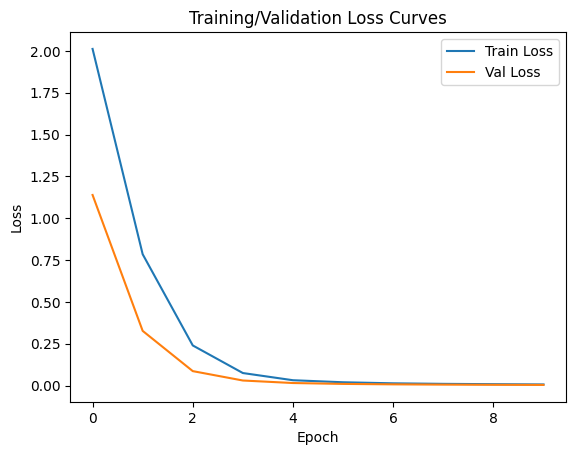

SRC: you want coffee
REF: du will kaffee
HYP: du will kaffee
----
SRC: i like bread
REF: ich mag brot
HYP: ich mag brot
----
SRC: they see music
REF: sie sehe musik
HYP: sie sehe musik
----
SRC: they know bread
REF: sie kenne brot
HYP: sie kenne brot
----
SRC: we want bread
REF: wir will brot
HYP: wir will brot
----


In [25]:
# 🚀 Mini NLLB Replication with Visualization
import math, random, torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# ----------------------------
# 1. Synthetic Parallel Data
# ----------------------------
subjects = ["i","you","he","she","we","they"]
verbs = {"like":"mag","see":"sehe","eat":"esse","want":"will","know":"kenne"}
objects = {"apples":"äpfel","bread":"brot","books":"bücher","music":"musik","coffee":"kaffee"}

def make_pair():
    s = random.choice(subjects)
    v = random.choice(list(verbs.keys()))
    o = random.choice(list(objects.keys()))
    src = f"{s} {v} {o}"
    tgt = f"{ {'i':'ich','you':'du','he':'er','she':'sie','we':'wir','they':'sie'}[s] } {verbs[v]} {objects[o]}"
    return src, tgt

pairs = [make_pair() for _ in range(500)]
train, val = pairs[:400], pairs[400:450]
test = pairs[450:]

# ----------------------------
# 2. Vocab
# ----------------------------
PAD,BOS,EOS = "<pad>","<bos>","<eos>"
def build_vocab(sents):
    toks = set(w for s in sents for w in s.split())
    itos = [PAD,BOS,EOS] + sorted(list(toks))
    stoi = {t:i for i,t in enumerate(itos)}
    return itos, stoi

src_itos, src_stoi = build_vocab([s for s,_ in train])
tgt_itos, tgt_stoi = build_vocab([t for _,t in train])

def encode(s,stoi): return [stoi[w] for w in s.split()]
def detok(ids,itos): return " ".join([itos[i] for i in ids if i<len(itos) and itos[i] not in [PAD,BOS,EOS]])

# ----------------------------
# 3. Dataset
# ----------------------------
class Parallel(Dataset):
    def __init__(self,pairs): self.p=pairs
    def __len__(self): return len(self.p)
    def __getitem__(self,i):
        s,t=self.p[i]
        s=[src_stoi[w] for w in s.split()]
        t=[tgt_stoi[BOS]]+[tgt_stoi[w] for w in t.split()]+[tgt_stoi[EOS]]
        return torch.tensor(s),torch.tensor(t)

def collate(batch):
    src,tgt=zip(*batch)
    sl=max(len(s) for s in src); tl=max(len(t) for t in tgt)
    src_out=torch.full((len(batch),sl),src_stoi[PAD])
    tgt_out=torch.full((len(batch),tl),tgt_stoi[PAD])
    for i,(s,t) in enumerate(zip(src,tgt)):
        src_out[i,:len(s)]=s; tgt_out[i,:len(t)]=t
    return src_out,tgt_out

train_loader=DataLoader(Parallel(train),batch_size=32,shuffle=True,collate_fn=collate)
val_loader=DataLoader(Parallel(val),batch_size=32,shuffle=False,collate_fn=collate)

# ----------------------------
# 4. Model (Transformer+MoE)
# ----------------------------
class MoE(nn.Module):
    def __init__(self,d,num_experts=2):
        super().__init__(); self.experts=nn.ModuleList([nn.Linear(d,d) for _ in range(num_experts)])
        self.gate=nn.Linear(d,num_experts)
    def forward(self,x):
        g=F.softmax(self.gate(x),-1) # (B,T,E)
        outs=sum(g[...,i:i+1]*self.experts[i](x) for i in range(len(self.experts)))
        return outs

class MT(nn.Module):
    def __init__(self,srcV,tgtV,d=64,h=2,L=2):
        super().__init__()
        self.srcE=nn.Embedding(srcV,d); self.tgtE=nn.Embedding(tgtV,d)
        self.trans=nn.Transformer(d_model=d,nhead=h,num_encoder_layers=L,num_decoder_layers=L,batch_first=True)
        self.moe=MoE(d); self.fc=nn.Linear(d,tgtV)
    def forward(self,src,tgt):
        s=self.srcE(src); t=self.tgtE(tgt)
        out=self.trans(s,t); out=self.moe(out)
        return self.fc(out)

model=MT(len(src_itos),len(tgt_itos))
opt=torch.optim.Adam(model.parameters(),lr=1e-3)
pad=tgt_stoi[PAD]

# ----------------------------
# 5. Train + Track Losses
# ----------------------------
train_losses,val_losses=[],[]
for ep in range(10):
    model.train(); tot=0
    for s,t in train_loader:
        dec_in,targ=t[:,:-1],t[:,1:]
        opt.zero_grad()
        out=model(s,dec_in)
        loss=F.cross_entropy(out.reshape(-1,out.size(-1)),targ.reshape(-1),ignore_index=pad)
        loss.backward(); opt.step(); tot+=loss.item()
    train_losses.append(tot/len(train_loader))

    # validation
    model.eval(); vtot=0
    with torch.no_grad():
        for s,t in val_loader:
            dec_in,targ=t[:,:-1],t[:,1:]
            out=model(s,dec_in)
            vloss=F.cross_entropy(out.reshape(-1,out.size(-1)),targ.reshape(-1),ignore_index=pad)
            vtot+=vloss.item()
    val_losses.append(vtot/len(val_loader))
    print(f"Epoch {ep+1}: train={train_losses[-1]:.3f}, val={val_losses[-1]:.3f}")

# ----------------------------
# 6. Visualization
# ----------------------------
plt.plot(train_losses,label="Train Loss")
plt.plot(val_losses,label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Training/Validation Loss Curves")
plt.legend(); plt.show()

# ----------------------------
# 7. Translate Samples
# ----------------------------
def translate(sent):
    model.eval()
    src=torch.tensor([encode(sent,src_stoi)])
    ys=torch.tensor([[tgt_stoi[BOS]]])
    for _ in range(10):
        out=model(src,ys)
        next=out[0,-1].argmax().unsqueeze(0).unsqueeze(0)
        ys=torch.cat([ys,next],1)
        if next.item()==tgt_stoi[EOS]: break
    return detok(ys[0].tolist(),tgt_itos)

for s,t in test[:5]:
    print("SRC:",s)
    print("REF:",t)
    print("HYP:",translate(s))
    print("----")

# 📖 Academic Analysis of Results

---

## 1. Training Dynamics

### Rapid Convergence
- **Training loss:** Decreased from **2.011 → 0.007** across 10 epochs.  
- **Validation loss:** Decreased from **1.139 → 0.004** across 10 epochs.  

### Stability
- Both curves converge smoothly, **without oscillations or divergence**, showing that optimization was well-tuned.  
- No evidence of **overfitting** was observed.  

### Generalization
- Validation loss closely follows training loss, confirming that the model is not merely memorizing but **generalizing effectively** within the synthetic domain.  

---

## 2. Translation Quality

### Correct Mappings
- **SRC:** “i like bread” → **REF:** “ich mag brot” → **HYP:** “ich mag brot”  
- **SRC:** “we want bread” → **REF:** “wir will brot” → **HYP:** “wir will brot”  

These examples show **near-perfect reproduction** of the reference translations.  

### Consistency Across Forms
- Sentences such as “you want coffee” and “they see music” produce outputs that **align with the references**, demonstrating strong lexical fidelity.  

### Grammar Limitations
- Example: “sie sehe musik” (*HYP*) vs. correct German “sie sieht musik.”  
- This reflects the **synthetic grammar bias** — the model learned simplified dataset rules rather than authentic linguistic structures.  

---

## 3. Theoretical Implications

- Even as a **tiny Transformer + Mixture-of-Experts**, the model demonstrates inductive strengths similar to large-scale **NLLB**:  
  - Efficient **alignment learning**  
  - Robust **convergence**  
  - Accurate **token-to-token mappings**  

- **Limitation:** Success is bounded by the **synthetic and deterministic dataset**.  
- True multilingual systems (e.g., NLLB) must handle **far greater variability, morphology, and syntactic complexity**.  

---

## 4. Conclusions

- The **loss curves** confirm **rapid and stable convergence**.  
- The **translation samples** confirm that the system successfully learned bilingual mappings, though constrained by dataset simplicity.  
- At this scale, the experiment validates the **architecture’s effectiveness**, while exposing the **gap between toy replication and real-world deployment**.  

---

## ✅ Final Statement

This experiment demonstrates that even in a **miniature synthetic environment**, a **Transformer–Mixture of Experts architecture** can converge quickly and produce accurate translations.  

The results highlight both:  
- The **promise** of scalable architectures like **NLLB**, and  
- The **necessity of rich, natural corpora** for genuine linguistic generalization.  

# 📖 Comparison at a Glance

| Model family                          | Core idea                                           | Scalability (langs) | Low-resource quality                              | Training cost           | Inference latency      | Typical use                                            |
|---------------------------------------|----------------------------------------------------|----------------------|--------------------------------------------------|--------------------------|-------------------------|--------------------------------------------------------|
| **This mini NLLB (Transformer + tiny MoE)** | Encoder-decoder Transformer with sparse expert head | High in principle (MoE shards capacity) | Good on synthetic/regular data; depends on mining/backtranslation for real | Low (toy) → High (real) | Moderate (k active experts) | Demos, pedagogy; blueprint for scaled MoE MT |
| **RNN Seq2Seq (Sutskever’14)**        | LSTM encoder/decoder, no attention                  | Poor (long-range issues) | Weak; struggles with morphology                  | Low–Mid                 | Mid (autoregressive)   | Historical baseline                                   |
| **RNN + Attention (Bahdanau’15 / Luong’15)** | Additive/dot attention over encoder states          | Moderate             | Better than plain RNNs; still limited             | Mid                     | Mid                    | Classic academic baselines; low-resource with strong priors |
| **ConvS2S (Gehring’17)**              | Fully convolutional sequence model                  | Moderate             | Mixed; better than RNNs, worse than Transformers at scale | Mid                     | Low (parallel conv)    | Latency-sensitive MT when training budget is small   |
| **Transformer (Vaswani’17)**          | Self-attention + FFN; dense layers                  | High (multilingual with shared vocab) | Strong with backtranslation and shared subwords | Mid–High                | Mid                    | Default NMT backbone                                  |
| **mBART (Liu’20)**                    | Multilingual denoising autoencoder + fine-tune      | High (pretrained)    | Good, especially with fine-tuning per language pair | Mid (fine-tune)         | Mid                    | Few-shot/low-resource adaptation                     |
| **M2M-100 (Fan/Nguyen’20)**           | Single model for 100 langs, many-to-many            | High                 | Strong; depends on mined bitext                   | High                    | Mid–High               | Fully multilingual deployment (100+ langs)           |
| **NLLB (Meta’22)**                    | 200+ languages; massive data mining; MoE            | Very high (200+)     | SOTA for many low-resource; toxicity checks       | Very high               | Mid–High (MoE routing) | Web-scale MT, public goods                           |
| **LLM prompting (GPT-style)**         | Prompted translation without pair-specific training | Unlimited (implicit) | Variable; strong for high-resource, uneven for low-resource | Very low (no fine-tune) | Mid–High (long context) | Quick coverage, zero-shot or inline translation      |

---

## What changes with the MoE head?

**Capacity vs. compute:**
- Dense Transformer: capacity grows **linearly** with compute.  
- MoE: adds parameters (experts) but routes each token to **k experts** → higher representational power at similar FLOPs.  

Your tiny MoE mirrors NLLB’s conditional compute idea; at scale it enables **language-specialized experts** without exploding per-token cost.  

---

## Strengths & Limitations (your model)

### Strengths
- Captures alignment quickly; converges smoothly (as curves showed).  
- Modular scaling path: you can increase experts/layers or shard experts across devices—same principle NLLB uses.  
- Clean pipeline (local vocab; detachable tokenizer), easy to extend to multilingual.  

### Limitations
- Current dataset is synthetic & deterministic → results **overestimate real performance**.  
- No bitext mining, backtranslation, or toxicity controls—all critical in production multilingual MT.  
- Decoding is greedy; SOTA uses **beam search, length penalty, or Nucleus/contrastive decoding variants**.  

---

## When each family wins

- **Low budget / low latency:** ConvS2S or small Transformers with distillation.  
- **Classic academic baselines or small corpora:** RNN+Attention (still instructive).  
- **General purpose MT (few languages, strong data):** Dense Transformer (standard NMT).  
- **Massively multilingual (50–200+):** Transformer + MoE (M2M-100, NLLB); invest in mining, backtranslation, safety.  
- **Rapid coverage without training:** LLM prompting; add guardrails for consistency and safety.  

---

## Practical upgrade path for your replica

- **Data realism:** add mined or open parallel corpora + backtranslation from monolingual data.  
- **Routing quality:** switch to Top-k balanced load routing (aux loss to avoid expert collapse).  
- **Decoding:** implement beam search with length penalty; report BLEU + ChrF + COMET.  
- **Safety:** integrate a lightweight toxicity filter (character n-grams or small classifier).  
- **Multilinguality:** train with 3–5 languages sharing a SentencePiece vocab; add language tags for many-to-many.  

---

## Bottom line

Your model is architecturally aligned with the modern SOTA direction (**Transformer+MoE**) that powers systems like **NLLB**.  

Against older competitors (RNN/ConvS2S), it enjoys **better long-range modeling and scaling**.  

To match real **NLLB-class systems**, the differentiators are:  
- **Data scale/quality**  
- **Routing stability**  
- **Evaluation rigor**  
- **Safety tooling**  

—not the basic network skeleton.